#  Wine Variety Prediction 

## Context
•	Imagine you are working as a Data Scientist for an Online Wine Shop named “The Wine Land” <br>
•	As the name suggests, the online store specializes in selling different varieties of wines.<br>
•	The online store receives a decent amount of traffic and reviews from its users.<br>
•	Leverage the “reviews” data and draw actionable insights from it.<br>

## What is Expected?
•	Build a predictive model for predicting the wine “variety”. Provide the output along with all features to a CSV file. Both Training & test data is provided here<br>
•	Submit the source code used for building models in a zip or share the link to the GitHub repository.<br>
•	Also submit a short summary: Model used, features extracted, Model accuracy in train. Along with some visualization of data and top 5 actionable Insights from the Data.<br>

## The Data Description is as follows:
•	user_name - user_name of the reviewer<br>
•	country -The country that the wine is from.<br>
•	review_title - The title of the wine review, which often contains the vintage.<br>
•	review_description - A verbose review of the wine.<br>
•	designation - The vineyard within the winery where the grapes that made the wine are from.<br>
•	points - ratings given by the user. The ratings are between 0 -100.<br>
•	price - The cost for a bottle of the wine<br>
•	province - The province or state that the wine is from.<br>
•	region_1 - The wine-growing area in a province or state (ie Napa).<br>
•	region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.<br>
•	winery - The winery that made the wine<br>
•	variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment<br>

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
4. **[Missing Data Analysis](#treat_missing_values)**
5. **[Missing Data Treatment](#Missing_Data_Treatment)**
6. **[Encoding categorical variables](#dummy_coding)**
7. **[Exploratory Data Analysis](#eda)**
8. **[Classification model](#modeling)**

<a id='import_packages'></a>
# 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='load_data'></a>
# 2. Load data

In [2]:
data = pd.read_csv(r"F:\datas\winedata\train.csv")

In [3]:
data.head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


<a id='data_preparation'></a>
# 3. Data Preparation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [5]:
# Checking data size
data.shape

(82657, 12)

# 3.1 Statistical Summary

In [6]:
# dataframe with categorical features
data.describe(include=['object'])

,user_name,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,358,1019,17,13786,28
top,@vossroger,US,Korbel NV Brut Sparkling (California),This offers that tempting aroma of toasted bag...,Reserve,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,25736,3334,7503,175,10587


In [7]:
# dataframe with numerical features
data.describe(include=['int64','float64'])

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


# 3.2 Understanding Target Variable

In [8]:
# seperating target variable
target = data['variety']
target.value_counts()

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

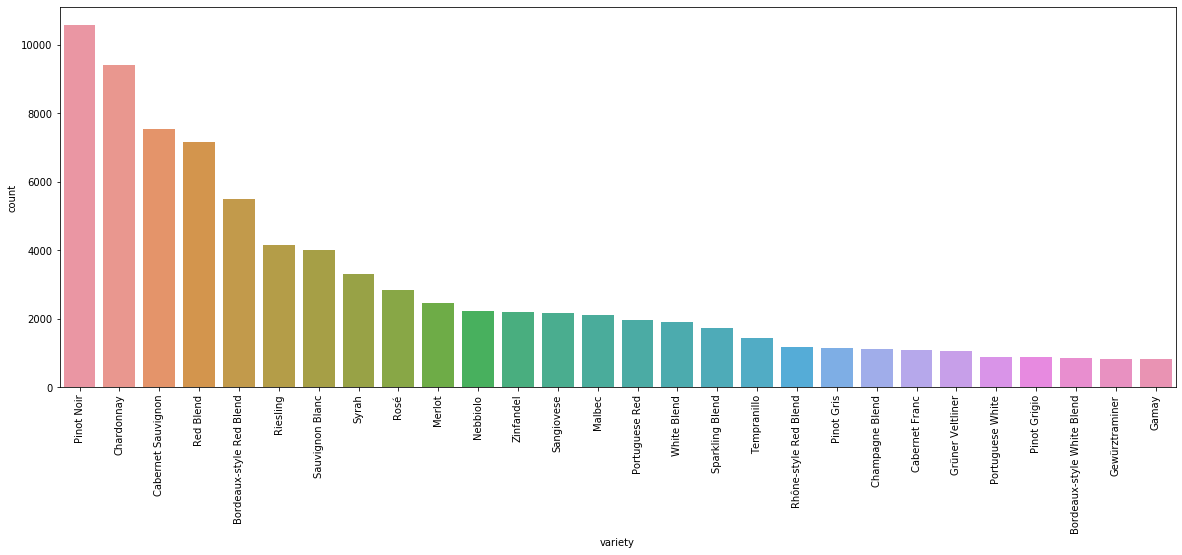

In [9]:
list1 = data.variety.value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=data, order = list1, ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [10]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [11]:
data.country.value_counts()

US                38573
France            15948
Italy              9112
Portugal           3197
Chile              2891
Spain              2755
Argentina          2570
Austria            1892
Germany            1573
New Zealand        1121
Australia          1028
South Africa        727
Israel              320
Canada              176
Greece              139
Bulgaria             93
Romania              80
England              62
Slovenia             42
Mexico               38
Hungary              35
Moldova              35
Uruguay              33
Turkey               33
Lebanon              28
Brazil               28
Morocco              21
Croatia              12
Georgia              12
Ukraine              11
Peru                  8
Cyprus                6
Switzerland           5
Macedonia             5
Luxembourg            5
Serbia                4
Czech Republic        3
India                 1
Name: country, dtype: int64

In [12]:
data = data.groupby('country').filter(lambda x: len(x) >200)

In [13]:
data.region_1.value_counts()

Napa Valley                                          3334
Columbia Valley (WA)                                 2951
Russian River Valley                                 2362
California                                           1902
Willamette Valley                                    1739
Mendoza                                              1584
Alsace                                               1445
Paso Robles                                          1376
Champagne                                            1300
Barolo                                               1293
Sonoma Coast                                         1188
Finger Lakes                                         1167
Sonoma County                                         917
Toscana                                               860
Chianti Classico                                      836
Carneros                                              796
Sta. Rita Hills                                       768
Walla Walla Va

In [14]:
data = data.groupby('region_1').filter(lambda x: len(x) >50)

In [15]:
data.winery.value_counts()

Chateau Ste. Michelle          163
Testarossa                     162
Williams Selyem                152
Georges Duboeuf                118
Columbia Crest                 112
Lynmar                          98
Gary Farrell                    97
Siduri                          97
Louis Latour                    93
Kendall-Jackson                 90
Fess Parker                     85
Martin Ray                      83
Iron Horse                      81
Chehalem                        80
Foxen                           80
V. Sattui                       77
Albert Bichot                   76
Kenwood                         75
Trapiche                        71
Lamoreaux Landing               70
De Loach                        70
Balletto                        69
Waterbrook                      68
Gloria Ferrer                   68
Kunde                           67
Dutton-Goldfield                67
Bernardus                       67
Seven Hills                     67
Willamette Valley Vi

In [16]:
data = data.groupby('winery').filter(lambda x: len(x) >5)

In [17]:
data.shape

(45691, 12)

In [18]:
# identifying duplicates
print("Total number of examples: ", data.shape[0])
print("Number of examples with the same review title and review description: ", data[data.duplicated(['review_description','review_title'])].shape[0])

Total number of examples:  45691
Number of examples with the same review title and review description:  2930


In [19]:
# removing duplicates
data=data.drop_duplicates(['review_description','review_title'])
data=data.reset_index(drop=True)

In [20]:
data.shape

(42761, 12)

<a id='treat_missing_values'></a>

# 4. Missing Data Analysis

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

In [21]:
data.shape[0]

42761

In [22]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region_2,16272,38.053366
user_name,11826,27.656042
designation,11302,26.430626
price,2241,5.240757
variety,0,0.000000
winery,0,0.000000
region_1,0,0.000000
province,0,0.000000
points,0,0.000000
review_description,0,0.000000


<a id='Missing_Data_Treatment'></a>
# 5. Missing Data Treatment

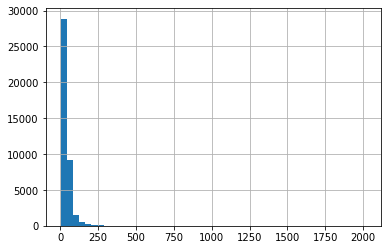

In [23]:
data['price'].hist(bins=50)

In [24]:
data['price'] = data['price'].fillna(data['price'].median())

In [25]:
data['price'].isnull().sum()

0

In [26]:
data['region_2'] = data['region_2'].fillna(data['region_2'].value_counts().index[0])

In [27]:
data['designation'] = data['designation'].fillna(data['designation'].value_counts().index[0])

In [28]:
data['region_1']= data['designation'].fillna(data['designation'].value_counts().index[0])

In [29]:
data.isnull().sum()

user_name             11826
country                   0
review_title              0
review_description        0
designation               0
points                    0
price                     0
province                  0
region_1                  0
region_2                  0
winery                    0
variety                   0
dtype: int64

In [30]:
raw_data=data.copy()

We will not impute the values for user_name column as we cannot randomly assign customer names to information. Anyway since we will drop this column while predicting the target the column can be left unaltered

<a id='dummy_coding'></a>
# 6. Encoding Categorical Variables

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
data.country = le.fit_transform(data.country)
data.province = le.fit_transform(data.province)
data.region_1 = le.fit_transform(data.region_1)
data.region_2 = le.fit_transform(data.region_2)
data.winery=le.fit_transform(data.winery)
data.designation=le.fit_transform(data.designation)

<a id='eda'></a>
# 7. Exploratory Data Analysis

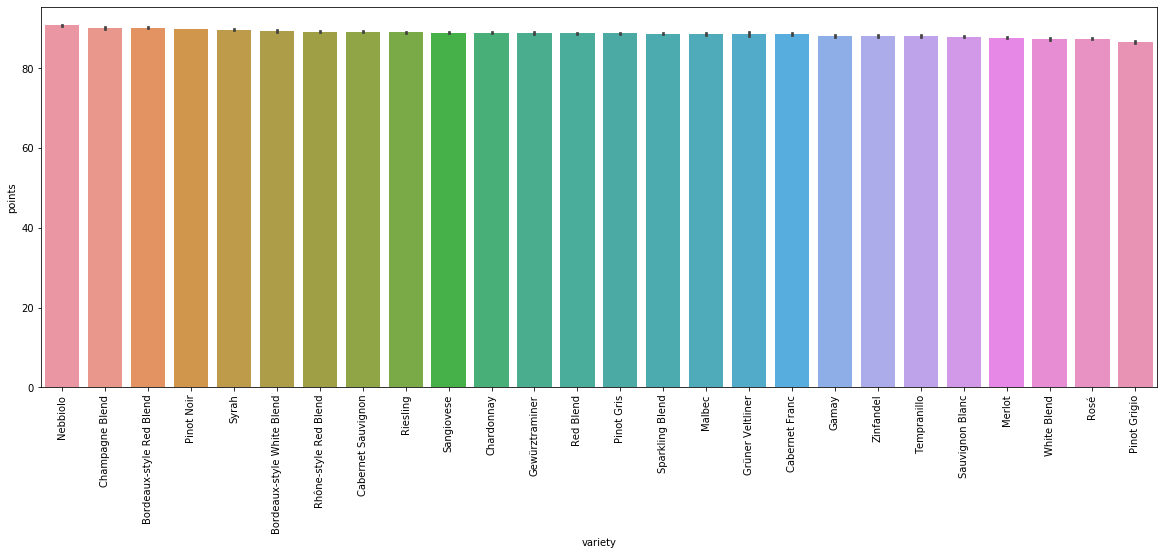

In [33]:
df_5 = pd.DataFrame({col:vals['points'] for col,vals in data.groupby('variety')})
mean1 = df_5.mean()
mean1.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.barplot(x='variety',y='points', data=data, order=mean1.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()

Looking at the above diagram we can completely exclude the points variable while prediction as it is not a good predictor.

In [34]:
data.shape

(42761, 12)

In [35]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@wawinereport,5,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,10118,89,15.0,30,10118,3,2043,Red Blend
1,NaN,3,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,2839,94,80.0,20,2839,1,2304,Nebbiolo
2,@wawinereport,5,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",12513,91,45.0,30,12513,3,1348,Red Blend
3,@vboone,5,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",8341,90,50.0,5,8341,12,2357,Zinfandel
4,@paulgwine,5,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",4701,91,48.0,19,4701,16,1136,Pinot Noir


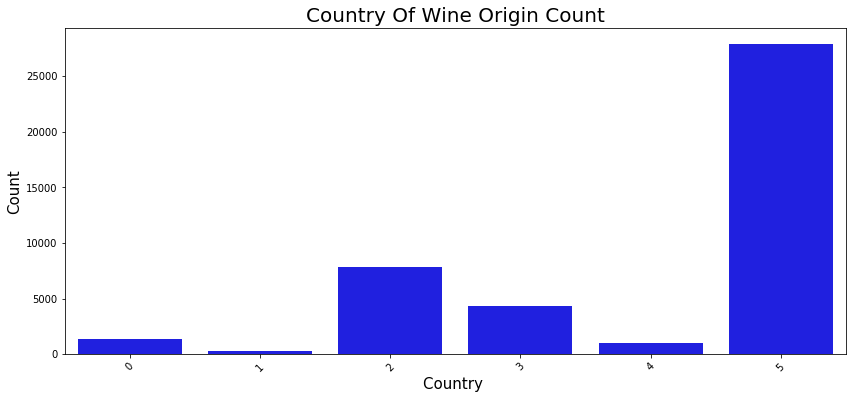

In [36]:
plt.figure(figsize=(14,6))

country = data.country.value_counts()

g = sns.countplot(x='country', 
                  data=data[data.country.isin(country.index.values)],
                 color='blue')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

Unlike conventional trend the highest amount of wine manufactured in this data is from United States instead of Italy, France or Spain.

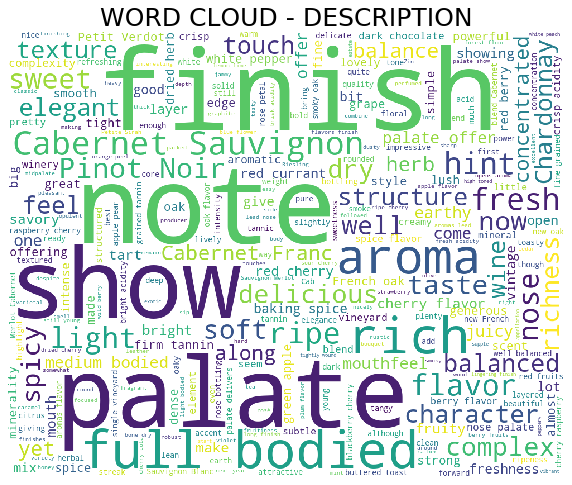

In [37]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(data['review_description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

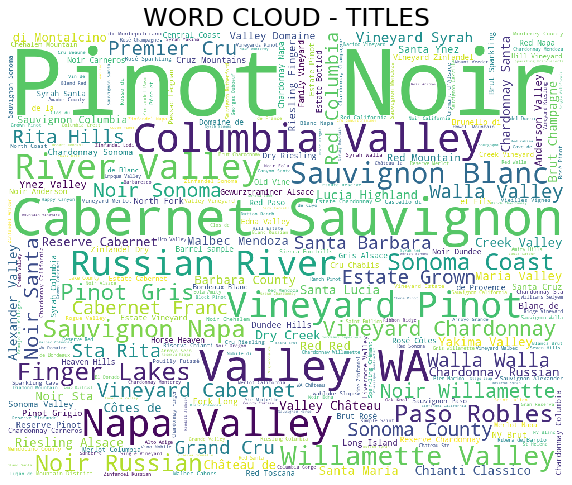

In [38]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(data['review_title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

In [39]:
data_sorted = data.sort_values(by='points', ascending=True)  # sort by points

num_of_wines = data_sorted.shape[0]  # number of wines
worst = data_sorted.head(int(0.25*num_of_wines))  # 25 % of worst wines listed
best = data_sorted.tail(int(0.25*num_of_wines))  # 25 % of best wines listed

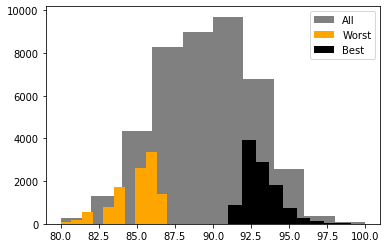

In [40]:
plt.hist(data['points'], color='grey', label='All')
plt.hist(worst['points'], color='orange', label='Worst')
plt.hist(best['points'], color='black', label='Best')
plt.legend()
plt.show()


In [41]:
minima=min(best['points'])
filters=data['points']>minima

In [42]:
dataframe=data[filters]
dataframe.shape

(9826, 12)

In [43]:
maxima=max(dataframe['points'])
filters1=dataframe['points']==maxima
df=dataframe[filters1]

In [44]:
filters1=df['variety']=='Bordeaux-style Red Blend'
datafr=df[filters1]
datafr

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
1797,@vossroger,2,Château Lafite Rothschild 2010 Pauillac,"Almost black in color, this stunning wine is g...",10118,100,1500.0,3,10118,1,618,Bordeaux-style Red Blend
10852,@vossroger,2,Château Cheval Blanc 2010 Saint-Émilion,This is the finest Cheval Blanc for many years...,10118,100,1500.0,3,10118,1,582,Bordeaux-style Red Blend
14747,@vossroger,2,Château Léoville Barton 2010 Saint-Julien,"This is a magnificently solid wine, initially ...",10118,100,150.0,3,10118,1,640,Bordeaux-style Red Blend
19115,@vossroger,2,Château Léoville Las Cases 2010 Saint-Julien,"A hugely powerful wine, full of dark, brooding...",10118,100,359.0,3,10118,1,641,Bordeaux-style Red Blend


In [45]:
minima=min(worst['points'])
filters=data['points']==minima
df=data[filters]

In [46]:
df['variety'].value_counts()

Cabernet Sauvignon          11
Sauvignon Blanc              8
Red Blend                    8
Zinfandel                    7
Malbec                       7
Pinot Noir                   6
Chardonnay                   5
Syrah                        5
Rosé                         5
Sparkling Blend              4
Merlot                       4
Tempranillo                  4
Champagne Blend              2
White Blend                  2
Pinot Gris                   2
Riesling                     2
Pinot Grigio                 2
Bordeaux-style Red Blend     1
Cabernet Franc               1
Gewürztraminer               1
Rhône-style Red Blend        1
Name: variety, dtype: int64

In [47]:
filter1=df['variety']== 'Cabernet Sauvignon'
df[filter1].shape

(11, 12)

In [48]:
df = raw_data.groupby('winery')['price'].mean().sort_values(ascending = False)
df.head(10)

winery
Yao Ming                         390.833333
Château La Mission Haut-Brion    377.444444
Krug                             351.500000
Verité                           351.428571
Château Haut-Brion               342.176471
Gaja                             337.000000
Blair                            324.714286
Poggio di Sotto                  295.714286
Château Cheval Blanc             269.900000
Tenuta dell'Ornellaia            267.222222
Name: price, dtype: float64

In [49]:
f1=raw_data['winery']=='Funky Llama'
f2=raw_data['winery']=='Yao Ming'
df1=raw_data[f1]
df2=raw_data[f2]

In [50]:
df1

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
5597,@wineschach,Argentina,Funky Llama 2011 Unoaked Chardonnay (Mendoza),Hay and green apple aromas are about all that ...,Unoaked,81,8.0,Mendoza Province,Unoaked,Central Coast,Funky Llama,Chardonnay
7857,@wineschach,Argentina,Funky Llama 2009 Sauvignon Blanc (Mendoza),"Not bad on the nose, where you get some tropic...",Reserve,82,6.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Sauvignon Blanc
11029,@wineschach,Argentina,Funky Llama 2007 Tempranillo (Mendoza),"Lightly brambled and ever so slightly green, w...",Reserve,83,6.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Tempranillo
21550,@wineschach,Argentina,Funky Llama 2011 Merlot (Mendoza),This opens with a familiar taste of artificial...,Reserve,82,8.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Merlot
31829,@wineschach,Argentina,Funky Llama 2011 Malbec (Mendoza),The nonexpressive berry and cherry aromas are ...,Reserve,81,8.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Malbec
38046,@wineschach,Argentina,Funky Llama 2009 Cabernet Sauvignon (Mendoza),"Jammy and murky smelling, and lacking clarity ...",Reserve,82,6.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Cabernet Sauvignon
40167,@wineschach,Argentina,Funky Llama 2007 Malbec (Mendoza),Brambly aromas precede sour flavors of pie che...,Reserve,81,6.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Malbec
40594,@wineschach,Argentina,Funky Llama 2010 Cabernet Sauvignon (Mendoza),Medicinal black cherry aromas turn heavier and...,Reserve,84,7.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Cabernet Sauvignon
40961,@wineschach,Argentina,Funky Llama 2007 Sauvignon Blanc (Mendoza),"Lightly tropical, with peach, citrus and pinea...",Reserve,83,6.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Sauvignon Blanc
41622,@wineschach,Argentina,Funky Llama 2010 Malbec (Mendoza),"Roasted, rubbery aromas fold in olive and asph...",Reserve,83,7.0,Mendoza Province,Reserve,Central Coast,Funky Llama,Malbec


In [51]:
df2

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
2376,NaN,US,Yao Ming 2010 Cabernet Sauvignon (Napa Valley),This fabulous Cabernet has been blended with M...,Reserve,95,150.0,California,Reserve,Napa,Yao Ming,Cabernet Sauvignon
3545,NaN,US,Yao Ming 2009 Family Reserve Cabernet Sauvigno...,The former basketball star's initial release i...,Family Reserve,97,625.0,California,Family Reserve,Napa,Yao Ming,Cabernet Sauvignon
14700,@vboone,US,Yao Ming 2011 Cabernet Sauvignon (Napa Valley),"Well-made and dancing in acidity, this Caberne...",Reserve,93,150.0,California,Reserve,Napa,Yao Ming,Cabernet Sauvignon
33652,NaN,US,Yao Ming 2010 Family Reserve Cabernet Sauvigno...,We can debate the pricing on Yao Ming's new re...,Family Reserve,98,625.0,California,Family Reserve,Napa,Yao Ming,Cabernet Sauvignon
35331,NaN,US,Yao Ming 2009 Cabernet Sauvignon (Napa Valley),"A lovely Cabernet, richly attractive and deepl...",Reserve,95,170.0,California,Reserve,Napa,Yao Ming,Cabernet Sauvignon
37656,@vboone,US,Yao Ming 2011 Family Reserve Cabernet Sauvigno...,"As imposing as the athlete himself, this is an...",Family Reserve,94,625.0,California,Family Reserve,Napa,Yao Ming,Cabernet Sauvignon


In [52]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import re

from nltk.tokenize import RegexpTokenizer

In [53]:
data['review_description']= data['review_description'].str.lower()
data['review_description']= data['review_description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
data['review_description']

0        this wine is near equal parts syrah and merlot...
1        barolo conca opens with inky dark concentratio...
2        half syrah and half cabernet sauvignon  with  ...
3        high toned red fruit stars in this wine  a nic...
4        displaying typical mcminnville ava subtlety  t...
5        with an alluring bouquet of fresh cut jasmine ...
6        produced from henry fessy s own cru vineyards ...
7        aromas suggesting underbrush  aromatic herb  v...
8        aromas of stewed prune and fig follow through ...
9        aromas of ripe  dark berry  mocha  toast and a...
10       a rich and opulent wine  very ripe  packed wit...
11       this young  textured wine shows a mix of stron...
12       falcone wisely reins in the fruity richness an...
13       a blend of nerello mascalese and nerello cappu...
14       a dry  decent wine for everyday purposes  this...
15       big and bold  this opens with aromas of baked ...
16       peach pit  apple and pear fruit flavors combin.

In [54]:
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = data['review_description'].apply(tokenizer.tokenize)
words_descriptions.head()


0    [this, wine, is, near, equal, parts, syrah, an...
1    [barolo, conca, opens, with, inky, dark, conce...
2    [half, syrah, and, half, cabernet, sauvignon, ...
3    [high, toned, red, fruit, stars, in, this, win...
4    [displaying, typical, mcminnville, ava, subtle...
Name: review_description, dtype: object

In [55]:
all_words = [word for tokens in words_descriptions for word in tokens]
data['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

1789307 words total, with a vocabulary size of 18773


In [56]:
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(500)

[('and', 115093),
 ('the', 73912),
 ('a', 60663),
 ('of', 57308),
 ('with', 39321),
 ('this', 37831),
 ('it', 31327),
 ('is', 30542),
 ('wine', 26071),
 ('in', 23465),
 ('flavors', 21252),
 ('s', 19521),
 ('to', 18943),
 ('fruit', 16402),
 ('on', 14090),
 ('that', 13260),
 ('from', 11342),
 ('palate', 11069),
 ('cherry', 10888),
 ('acidity', 10774),
 ('aromas', 10706),
 ('tannins', 10319),
 ('but', 10228),
 ('finish', 9776),
 ('black', 9684),
 ('ripe', 8791),
 ('drink', 8670),
 ('are', 8394),
 ('for', 7791),
 ('has', 7758),
 ('oak', 7064),
 ('red', 7042),
 ('dry', 6547),
 ('by', 6437),
 ('as', 6226),
 ('rich', 6218),
 ('its', 6156),
 ('spice', 5950),
 ('an', 5945),
 ('notes', 5456),
 ('now', 5433),
 ('full', 5352),
 ('nose', 4993),
 ('fresh', 4782),
 ('cabernet', 4713),
 ('well', 4614),
 ('berry', 4513),
 ('sweet', 4490),
 ('soft', 4427),
 ('shows', 4264),
 ('blackberry', 4225),
 ('blend', 4221),
 ('apple', 4205),
 ('light', 4173),
 ('bodied', 4106),
 ('texture', 4090),
 ('dark', 4047)

In [57]:
stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])
data['description_cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))

In [58]:
all_words = [word for tokens in words_descriptions for word in tokens]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
count_all_words = Counter(all_words)
count_all_words.most_common(100)

1089302 words total, with a vocabulary size of 12992


[('wine', 26958),
 ('flavor', 24139),
 ('fruit', 20377),
 ('cherri', 12900),
 ('acid', 12479),
 ('finish', 11577),
 ('tannin', 11231),
 ('aroma', 11202),
 ('palat', 11115),
 ('drink', 10009),
 ('dri', 9718),
 ('black', 9701),
 ('ripe', 9485),
 ('rich', 7906),
 ('spice', 7708),
 ('oak', 7244),
 ('red', 7126),
 ('note', 7093),
 ('show', 7089),
 ('fresh', 6112),
 ('full', 5394),
 ('sweet', 5302),
 ('balanc', 5301),
 ('berri', 5299),
 ('blackberri', 5272),
 ('textur', 5268),
 ('bodi', 5113),
 ('nose', 4996),
 ('blend', 4980),
 ('offer', 4974),
 ('appl', 4860),
 ('cabernet', 4795),
 ('soft', 4645),
 ('age', 4624),
 ('well', 4621),
 ('plum', 4424),
 ('raspberri', 4303),
 ('structur', 4294),
 ('light', 4291),
 ('herb', 4211),
 ('vineyard', 4139),
 ('crisp', 4070),
 ('dark', 4067),
 ('vanilla', 4019),
 ('year', 3876),
 ('give', 3623),
 ('miner', 3581),
 ('complex', 3496),
 ('pepper', 3478),
 ('good', 3391),
 ('fruiti', 3346),
 ('pinot', 3314),
 ('hint', 3311),
 ('currant', 3289),
 ('bottl', 32

<a id='modeling'></a>
# 8. Classification Model

For predicting the wine variety we need to pick the set of best features that influence the type of wine variety.

In [59]:
data.head(2)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,description_lengths,description_cleaned
0,@wawinereport,5,North by Northwest 2014 Red (Columbia Valley (...,this wine is near equal parts syrah and merlot...,10118,89,15.0,30,10118,3,2043,Red Blend,40,wine near equal part syrah merlot balanc caber...
1,NaN,3,Renato Ratti 2007 Conca (Barolo),barolo conca opens with inky dark concentratio...,2839,94,80.0,20,2839,1,2304,Nebbiolo,43,barolo conca open inki dark concentr sooth aro...


In [60]:
data.variety=le.fit_transform(data.variety)
target=data['variety']

In [61]:
X=data.iloc[:,[1,4,6,7,8,9,10,12]]

In [62]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (29932, 8)
x_test  (12829, 8)
y_train  (29932,)
y_test  (12829,)


## Decision tree model

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() 
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
dt_pred = dtree.predict(x_test)
dt_acc = accuracy_score(dt_pred, y_test)
dt_acc

0.49957128381011773

In [65]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       778
           1       0.32      0.37      0.34       107
           2       0.24      0.27      0.26       191
           3       0.50      0.49      0.49      1380
           4       0.80      0.80      0.80       261
           5       0.48      0.45      0.46      1833
           6       0.98      1.00      0.99       129
           7       0.36      0.32      0.34       210
           8       0.42      0.29      0.34        28
           9       0.44      0.43      0.43       387
          10       0.24      0.21      0.22       492
          11       0.99      0.96      0.97       436
          12       0.35      0.40      0.37        97
          13       0.35      0.30      0.32       295
          14       0.60      0.64      0.62      1971
          15       0.43      0.48      0.45       794
          16       0.38      0.44      0.41       140
          17       0.44    

## Randomforest Model

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rfc_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(rfc_pred, y_test)
rfc_acc

0.5330890950190974

In [68]:
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       805
           1       0.14      0.37      0.21        49
           2       0.26      0.31      0.28       180
           3       0.54      0.45      0.49      1588
           4       0.86      0.81      0.83       277
           5       0.52      0.44      0.48      2024
           6       0.98      0.98      0.98       133
           7       0.36      0.37      0.37       183
           8       0.58      0.44      0.50        25
           9       0.51      0.51      0.51       371
          10       0.21      0.22      0.21       410
          11       0.98      0.99      0.98       422
          12       0.34      0.42      0.38        90
          13       0.36      0.35      0.35       259
          14       0.68      0.61      0.64      2329
          15       0.50      0.55      0.52       800
          16       0.31      0.57      0.40        90
          17       0.48    

## Adaboost classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=15)
dt.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [70]:
ada_pred = dt.predict(x_test)
ada_acc = accuracy_score(ada_pred, y_test)
ada_acc

0.5096266271728116

In [71]:
print(classification_report(ada_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       709
           1       0.42      0.46      0.44       116
           2       0.16      0.17      0.17       198
           3       0.49      0.46      0.48      1421
           4       0.80      0.82      0.81       256
           5       0.44      0.41      0.43      1824
           6       0.98      0.99      0.99       131
           7       0.29      0.29      0.29       191
           8       0.21      0.20      0.21        20
           9       0.42      0.49      0.45       321
          10       0.22      0.21      0.21       463
          11       0.98      0.98      0.98       427
          12       0.29      0.32      0.30       100
          13       0.26      0.25      0.25       262
          14       0.62      0.60      0.61      2182
          15       0.43      0.47      0.45       814
          16       0.32      0.39      0.35       132
          17       0.47    